# Implementation of Regression and Tree Decision Models

In order to get a models that enables us to predict sales given the features two models were implemented: 
- **Linear Regression**
    - $R²$ Score: 0.5564
    - Average Error (RMSE): 1142.0976 USD
- **Decision Tree Classifier** 
    - $R²$ Score: 0.5852
    - Average Error (RMSE): 1104.4446 USD

In [5]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/cleaned/dataset_cleaned.csv")
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


## Splitting the Dataset 

In [ ]:
## the column Item_Identifier is no so useful in this case because 

In [3]:
X = df.drop(columns=["Item_Outlet_Sales", "Item_Identifier"])
y = df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
num_features = make_column_selector(dtype_include="number")(X_train)
cat_features = make_column_selector(dtype_include="object")(X_train)
print(f"Numerical columns: {num_features} \nCategorical columns: {cat_features}")
#print(f"Nominal features: {features[0]} \nCategorical features: {features[1]}")

Numerical columns: ['Item_Visibility', 'Item_MRP'] 
Categorical columns: ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In this case we can observe that the all the **ordinal features** are as follow:
- Outlet_Size
- Item_Fat_Content

The **nominal features** are the following:
- Item_Identifier --> This column will be deleted because it has more that 1000 categories and it is possible to do the analysis without the column.
- Item_Type
- Outlet_Identifier
- Outlet_Location_Type
- Outlet_Type

## Instantiate Transformers

In [8]:
ordinal_encoder = OrdinalEncoder()
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
imputer = SimpleImputer(strategy="constant")

## Instantiate Pipelines

In [17]:
#num_pipe = make_pipeline(scaler)
#nom_cat_pipe = make_pipeline(ohe)
ord_cat_pipe = make_pipeline(imputer, ordinal_encoder)
ord_cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='constant')),
                ('ordinalencoder', OrdinalEncoder())])

In [18]:
num_tuple = (scaler, ['Item_MRP'])
ord_tuple = (ord_cat_pipe, ["Item_Fat_Content", "Outlet_Size"])
nom_tuple = (ohe, ["Item_Type", "Outlet_Identifier", "Outlet_Location_Type", "Outlet_Type"])

## Instantiate ColumnTransformer

In [19]:
preprocessor = make_column_transformer(num_tuple, ord_tuple, nom_tuple)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Item_MRP']),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

In [20]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_test_processed

array([[-0.99881554,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.58519423,  0.        ,  3.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.59578435,  1.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.09397975,  0.        ,  2.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.36679966,  0.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.11221189,  0.        ,  2.        , ...,  1.        ,
         0.        ,  0.        ]])

# Models

## Linear regression

In [37]:
reg = LinearRegression() # to instantiate the class
reg.fit(X_train_processed, y_train) # stimate the parameters

LinearRegression()

In [11]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

### Regression predictions

In [38]:
reg_test_predictions = reg.predict(X_test_processed)

print(f"Prediction {reg_test_predictions[:20].tolist()}")
print(f"\nActual {y_test[:20].tolist()}")

Prediction [1328.0, 704.0, 832.0, 4256.0, 3328.0, 544.0, 4776.0, 2048.0, 1336.0, 2768.0, -192.0, 2064.0, 3936.0, 896.0, 752.0, 4344.0, 1712.0, 1776.0, 1936.0, 3232.0]

Actual [1743.0644, 356.8688, 377.5086, 5778.4782, 2356.932, 865.54, 4613.994, 2410.8618, 1948.1308, 1937.478, 210.3928, 255.0014, 4541.4218, 657.8104, 578.5802, 4229.1616, 1267.0174, 2388.8904, 1797.66, 4447.544]


There are predictions below zero which does not make sense. It seem that the performance of this model will not be so good. Let's evaluate the model.

### $R²$ Linear Regression

In [39]:
reg_train_score = reg.score(X_train_processed, y_train)
reg_test_score = reg.score(X_test_processed, y_test)
print(f"Train Score: {reg_train_score}")
print(f"Test Score: {reg_test_score}")

Train Score: 0.560781348706715
Test Score: 0.5678043313543132


Having seen the scores in both training ad test data sets it can be said that the model **does not present overfitting, but it does not explain so good the relationship among the features and the label** which was to be expected since the characteristics were not correlated. Let's check the root of the mean square error.

### Mean Square Error Linear regression

In [40]:
train_pred = reg.predict(X_train_processed)
test_pred = reg.predict(X_test_processed)

In [41]:
mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)
print(f"Training Score: {mse_train}")
print(f"Testing Score: {mse_test}")

Training Score: 1299848.1431043735
Testing Score: 1192418.0336818607


In [42]:
print(f"Training Score: {np.sqrt(mse_train)}", f"\nTesting Score {np.sqrt(mse_test)}")

Training Score: 1140.108829500225 
Testing Score 1091.9789529482061


Given the scores it can be said that in average the error in the prediction is $\pm$ 1142.10 dollars in the sales prediction, given the test data set. 

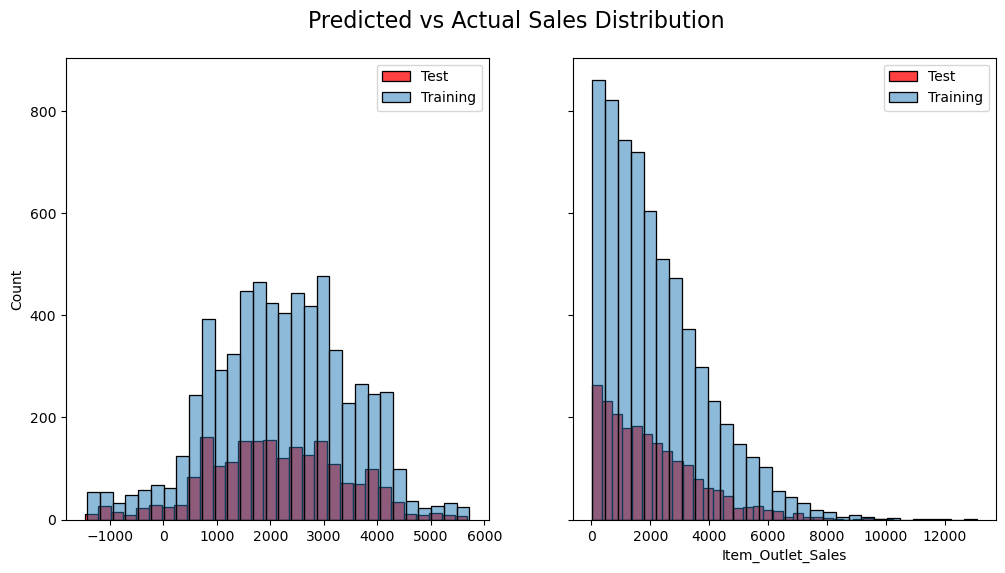

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,6))
sns.histplot(test_pred, color="red", bins=30, ax=ax1)
sns.histplot(train_pred, bins=30, alpha=0.5, ax=ax1)
sns.histplot(y_test, bins=30, ax=ax2, color="red")
sns.histplot(y_train, bins=30, ax=ax2, alpha=0.5)
#plt.xlim(0, 6500)
ax1.legend(labels=["Test", "Training"])
ax2.legend(labels=["Test", "Training"])
plt.suptitle("Predicted vs Actual Sales Distribution", y=0.96, fontsize=16)
plt.show()

## Regression Tree

In [44]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
tree_train_pred = dec_tree.predict(X_train_processed)
tree_test_pred = dec_tree.predict(X_test_processed)
print(f"Test Prediction {tree_test_pred[:20].tolist()}")
print(f"\nActual Test {y_test[:20].tolist()}")

Test Prediction [805.618, 1150.5024, 1198.44, 4763.799, 589.233, 432.77, 5303.097, 421.4514, 1833.6132, 3099.9648, 205.0664, 982.7208, 8604.7992, 623.1888, 571.2564, 9779.9362, 1036.6506, 205.0664, 1446.1176, 3415.554]

Actual Test [1743.0644, 356.8688, 377.5086, 5778.4782, 2356.932, 865.54, 4613.994, 2410.8618, 1948.1308, 1937.478, 210.3928, 255.0014, 4541.4218, 657.8104, 578.5802, 4229.1616, 1267.0174, 2388.8904, 1797.66, 4447.544]


In [46]:
tree_r2_train_score = dec_tree.score(X_train_processed, y_train)
tree_r2_test_score = dec_tree.score(X_test_processed, y_test)
print(f"Training Score: {tree_r2_train_score}",f"\nTestting Score: {tree_r2_test_score}")

Training Score: 1.0 
Testting Score: 0.1965152901165209


We see that the model presents **overfitting**, so let's modify the hyperparameters. 

In [21]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Let's get the depth to see the prove the performance with different depths. 

In [47]:
dec_tree.get_depth()

39

In [48]:
max_depth_range = list(range(2, 39))
r2 = []

for depth in max_depth_range:
    tree = DecisionTreeRegressor(max_depth=depth,
                                random_state=42)
    tree.fit(X_train_processed, y_train)
    r2.append(tree.score(X_test_processed, y_test))

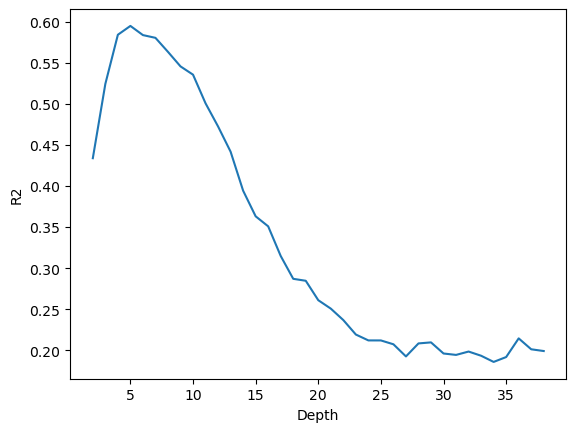

In [49]:
plt.plot(max_depth_range, r2)
plt.xlabel("Depth")
plt.ylabel("R2")
plt.show()

Getting the scores in the test data set we see that the model presents a better performance when the depth has a vaue of six, so let's use that value in the model.

### $R²$ Decision Tree Regressor

In [22]:
tree_depth_6 = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_depth_6.fit(X_train_processed, y_train)
print(f"Training Score: {tree_depth_6.score(X_train_processed, y_train)}",
     f"Testing Score: {tree_depth_6.score(X_test_processed, y_test)}")

Training Score: 0.6148813029313948 Testing Score: 0.5839221820559304


In this case we have get a better score in the testing data set. Let's check the root of the mean square error.

### RMSE 

In [23]:
train_pred_dtree = tree_depth_6.predict(X_train_processed)
test_pred_dtree = tree_depth_6.predict(X_test_processed)

In [52]:
mse_train_dtree = mean_squared_error(y_train, train_pred_dtree)
mse_test_dtree = mean_squared_error(y_test, test_pred_dtree)
print(f"Training Score: {mse_train_dtree}")
print(f"Testing Score: {mse_test_dtree}")

Training Score: 1139490.2791227377
Testing Score: 1148860.8219068756


In [53]:
print(f"Training Score: {np.sqrt(mse_train_dtree)}", f"\nTesting Score {np.sqrt(mse_test_dtree)}")

Training Score: 1067.469099844458 
Testing Score 1071.849253349964


Given the scores it can be said that in average the error in the prediction is $\pm$ 1104.44 dollars in the sales prediction, given the test data set. Which is less compare to the regression model.

In [32]:
test_to_submit = pd.read_csv("../data/raw/test_file.csv")
test_to_submit.drop(columns="Item_Weight", inplace=True)
test_to_submit.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [36]:
pipeline_with_model = make_pipeline(preprocessor)
pipeline_with_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Item_MRP']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['Item_Fat_Content',
                                                   'Outlet_Size']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])]))])

In [39]:
df_to_submit_procesed = pipeline_with_model.transform(test_to_submit)

In [41]:
results = tree_depth_6.predict(df_to_submit_procesed)

In [45]:
to_submit = pd.DataFrame([test_to_submit["Item_Identifier"],test_to_submit["Outlet_Identifier"],results] )
to_submit = to_submit.T
to_submit.columns = ["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"]
to_submit

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1637.112024
1,FDW14,OUT017,1388.148014
2,NCN55,OUT010,542.177443
3,FDQ58,OUT017,2505.529197
4,FDY38,OUT027,6655.241686
...,...,...,...
5676,FDB58,OUT046,2073.673265
5677,FDD47,OUT018,2851.561304
5678,NCO17,OUT045,2073.673265
5679,FDJ26,OUT017,4161.263588


In [46]:
to_submit.to_csv(path_or_buf="../data/cleaned/predictions.csv", index=False)

## Sales Distribution

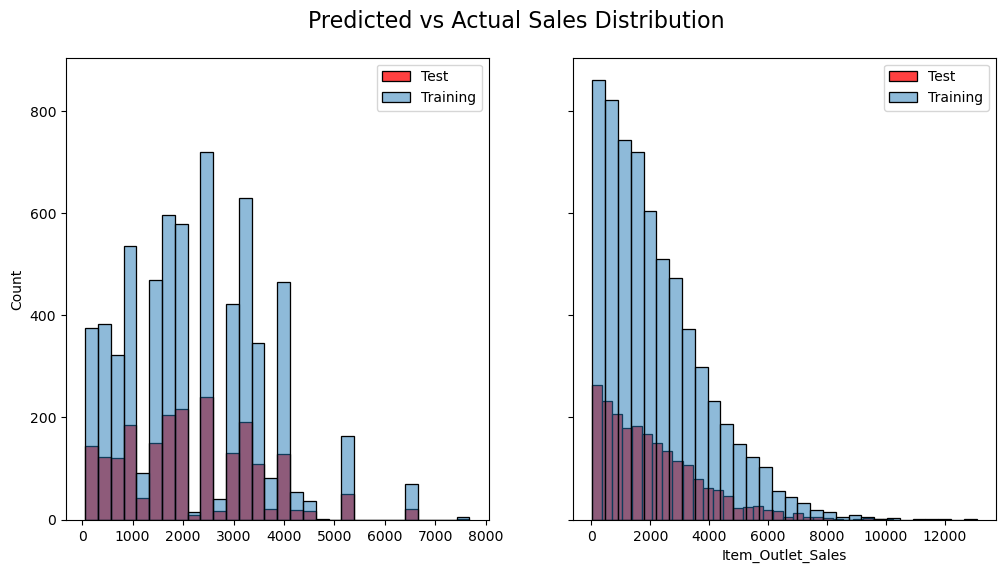

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,6))
sns.histplot(test_pred_dtree, color="red", bins=30, ax=ax1)
sns.histplot(train_pred_dtree, bins=30, alpha=0.5, ax=ax1)
sns.histplot(y_test, bins=30, ax=ax2, color="red")
sns.histplot(y_train, bins=30, ax=ax2, alpha=0.5)
#plt.xlim(0, 6500)
ax1.legend(labels=["Test", "Training"])
ax2.legend(labels=["Test", "Training"])
plt.suptitle("Predicted vs Actual Sales Distribution", y=0.96, fontsize=16)
plt.show()

In [58]:
#%conda install -c conda-forge xgboost
from xgboost import XGBRegressor

In [61]:
xgb = XGBRegressor()
xgb.fit(X_train_processed, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [62]:
print('Training accuracy:', xgb.score(X_train_processed, y_train))
print('Testing accuracy:', xgb.score(X_test_processed, y_test))

Training accuracy: 0.848550200550173
Testing accuracy: 0.5263640740405495


In [64]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [80]:
xgb_2 = XGBRegressor(n_estimators=8)
xgb_2.fit(X_train_processed, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=8, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [81]:
print('Training accuracy:', xgb_2.score(X_train_processed, y_train))
print('Testing accuracy:', xgb_2.score(X_test_processed, y_test))

Training accuracy: 0.6317599599727051
Testing accuracy: 0.5911272756964827


# Model Selection

Given the results, the model that best fits the real data is the Regression Tree, obtaining a score of 58% on the test data set. Although the intended distribution is quite different from the actual one, this is the best option so far.

X = df.drop(columns=["Item_Outlet_Sales"])
y = df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X

ordinal_encoder = OrdinalEncoder()
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
num_pipe = make_pipeline(scaler)
ord_cat_pipe = make_pipeline(ordinal_encoder)
nom_cat_pipe = make_pipeline(ohe)